In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors
import pandas as pd

In [2]:
saveState = False
regMethodDir = "gradient"
regMethod = ""

if regMethodDir == "gradient":
    regMethod = "Gradientní sestup"
elif regMethodDir == "gradientline":
    regMethod = "Gradientní sestup se zlatým řezem"
elif regMethodDir == "gradientlbf":
    regMethod = "BFGS s omezenou pamětí"
    
view = "ap"
colors = list(mcolors.TABLEAU_COLORS.values())
patNumbers = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
pd.set_option("display.precision", 3, "styler.format.decimal", ",")

initialErrors = np.zeros(shape=(12, 2, 10))
gradientErrors = np.zeros(shape=(12, 3, 10))
# gradientLineErrors = np.zeros(shape=(10, 12))
# gradientLbfErrors = np.zeros(shape=(10, 12))

# gradientMeanErrors = np.zeros(shape=(12))
# gradientLineMeanErrors = np.zeros(shape=(12))
# gradientLbfMeanErrors = np.zeros(shape=(12))
meanErrors = np.zeros(shape=(12, 5))

for idx, num in enumerate(patNumbers):
    gradErrors = np.load(f"input_files\\pacient_{num}\\"
                         f"registration\\gradient\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    # gradLineErrors = np.load(f"input_files\\pacient_{num}\\"
    #                          f"registration\\gradientline\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    # gradLbfErrors = np.load(f"input_files\\pacient_{num}\\"
    #                         f"registration\\gradientlbf\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    
    initialErrors[idx, 0, :] = gradErrors[0, :]
    initialErrors[idx, 1, :] = gradErrors[1, :]
    gradientErrors[idx, 0, :] = gradErrors[-1, :]
    gradientErrors[idx, 1, :] = (gradErrors[-1, :] + 5 * np.random.random()) # změnit na gradLineErrors[-1, :]
    gradientErrors[idx, 2, :] = (gradErrors[-1, :] + 5 * np.random.random()) # změnit na gradLbfErrors[-1, :]
    
    meanErrors[idx, 0] = np.mean(gradErrors[0, :])
    meanErrors[idx, 1] = np.mean(gradErrors[1, :])
    meanErrors[idx, 2] = np.mean(gradErrors[-1, :])
    meanErrors[idx, 3] = np.mean(gradErrors[-1, :] + 5 * np.random.random())
    meanErrors[idx, 4] = np.mean(gradErrors[-1, :] + 5 * np.random.random())

In [41]:
regStages = ["Před inicializací", "Po inicializaci", "Gradientní\nsestup", 
             "Gradientní sestup\nse zlatým řezem", "BFGS s\nomezenou pamětí"]
regCols = ["pre", "initial", "grad", 
             "grad_line", "grad_lbf"]
regLabels = ["Před inicializací", "Po inicializaci", "Gradientní sestup", 
             "Gradientní sestup se zlatým řezem", "BFGS s omezenou pamětí"]

print("Průměrná mezibodová vzdálenost a výběr nejmenší vzdálenosti pro individuální pacienty napříč metodami")

gradMeanDf = pd.DataFrame(meanErrors, columns=pd.Index(regLabels), 
                          index=range(1, meanErrors.shape[0] + 1))
gradMeanDf.T

Průměrná mezibodová vzdálenost a výběr nejmenší vzdálenosti pro individuální pacienty napříč metodami


,1,2,3,4,5,6,7,8,9,10,11,12
Před inicializací,70.389,114.492,56.573,79.646,83.418,120.179,57.460,22.929,121.469,28.806,46.011,115.749
Po inicializaci,79.084,79.011,17.276,82.331,24.389,53.375,30.679,11.234,46.936,29.499,33.118,35.277
Gradientní sestup,31.962,18.027,4.587,8.945,10.689,13.770,4.624,8.560,4.567,16.784,21.357,3.816
Gradientní sestup se zlatým řezem,33.901,18.759,6.015,9.881,12.198,14.814,6.318,13.173,6.236,19.658,25.765,8.223
BFGS s omezenou pamětí,33.039,21.409,8.807,11.280,12.316,13.789,5.344,13.170,5.660,16.964,23.554,4.608


In [40]:
gradMeanDf.min(axis=1)

1     31.962
2     18.027
3      4.587
4      8.945
5     10.689
6     13.770
7      4.624
8      8.560
9      4.567
10    16.784
11    21.357
12     3.816
dtype: float64

Rozložení mezibodových vzdáleností napříč všemi pacienty podle registračních fází


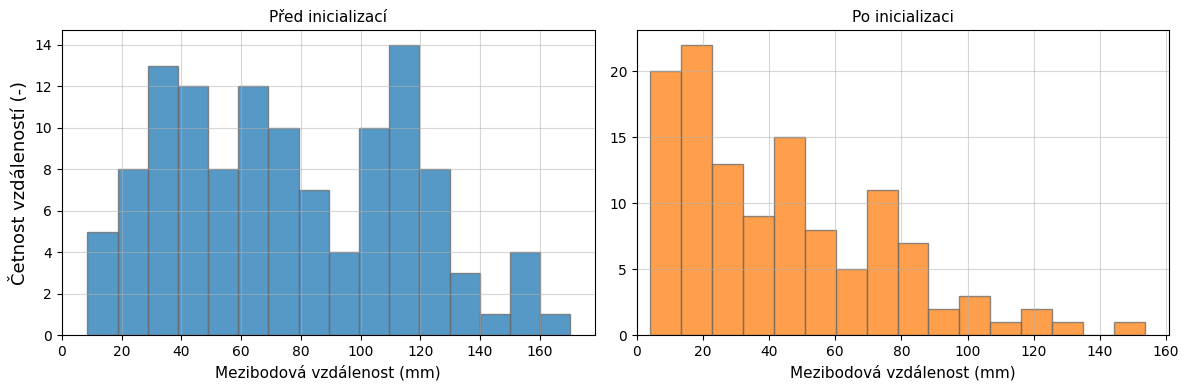

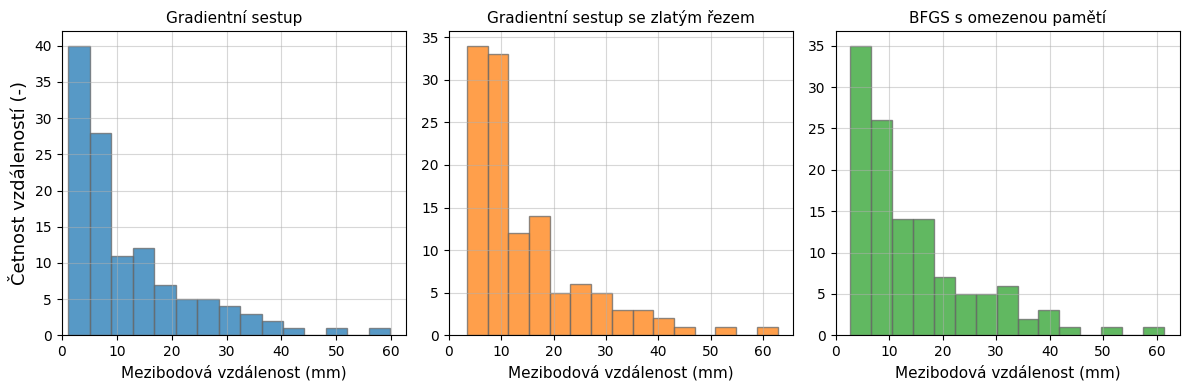

In [43]:
def plotErrorHist(error_values, reg_methods, hist_bins=(17, 17, 17), hist_type="initial", save=False):
    
    fig_hist, ax_hist = plt.subplots(1, error_values.shape[1], figsize=(12, 4))


    indexes = np.arange(0, error_values.shape[1])
    for ax, idx, method, color, hist_bin in zip(ax_hist.ravel(), indexes, reg_methods, colors, hist_bins):
        ax.hist(error_values[:, idx].ravel(), bins=hist_bin, alpha=0.75, color=color, 
                edgecolor="dimgray", linewidth=1.)
        ax.grid(alpha=0.5)
        #ax.set_xticks(np.arange(0, gradientErrors[:, 0].max() + 10, 20))
    #ax_hist.set_yticks(np.arange(0, np.histogram(gradientErrors[:, 2].ravel())[0][0], 10))
        ax.set_xlabel("Mezibodová vzdálenost (mm)", fontsize=11)
        ax.set_title(method, fontsize=11)
        ax.set_ylim([0, None])
        ax.set_xlim([0, None])
    ax_hist[0].set_ylabel("Četnost vzdáleností (-)", fontsize=13)
    # ax_hist.set_title("Rozložení míry nepřesností")
    # ax_hist.legend()
    fig_hist.tight_layout()
    plt.show()

    if save:
        fig_hist.savefig(f"input_files\\globalni_grafy\\{hist_type}Histogram.pdf", bbox_inches="tight")

print("Rozložení mezibodových vzdáleností napříč všemi pacienty podle registračních fází")
regMethods = ["Gradientní sestup", "Gradientní sestup se zlatým řezem", "BFGS s omezenou pamětí"]

plotErrorHist(initialErrors, ["Před inicializací", "Po inicializaci"], 
               hist_bins=(16, 16), save=saveState)
plotErrorHist(gradientErrors, regMethods, hist_bins=(15, 15, 15), hist_type="initial", save=saveState)

In [7]:
patientNumber = "02"
regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")

regInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}registrationInfo{view.upper()}.npz"))
errorsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}ErrorsInfo{view.upper()}.npz"))
colors = list(mcolors.TABLEAU_COLORS.values())
regInfo = {key: regInfoFile[key] for key in regInfoFile.files}
errorsInfo = {key: errorsInfoFile[key] for key in errorsInfoFile.files} 

metricValues = [np.load(f"input_files\\pacient_{patientNumber}\\registration\\gradient\\"
                        f"pacient{patientNumber}registrationInfo{view.upper()}.npz")["metricValues"],
                np.load(f"input_files\\pacient_{patientNumber}\\registration\\gradientline\\"
                        f"pacient{patientNumber}registrationInfo{view.upper()}.npz")["metricValues"],
                np.load(f"input_files\\pacient_{patientNumber}\\registration\\gradientlbf\\"
                        f"pacient{patientNumber}registrationInfo{view.upper()}.npz")["metricValues"]]

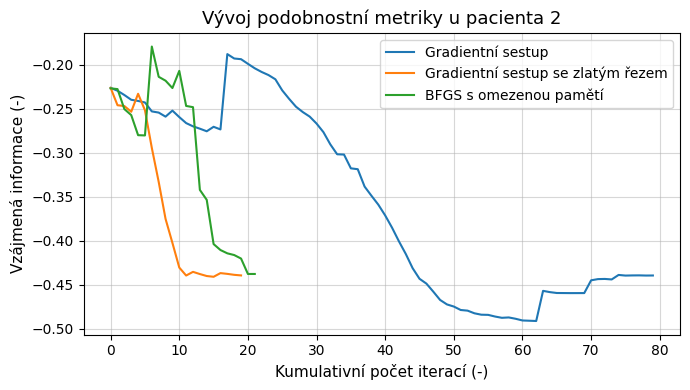

In [16]:
def plotAllMetrics(metric_values, pat_number, save=False):
    
    fig_metrics, ax_metrics = plt.subplots(1, 1, figsize=(7, 4))
    
    labels = ["Gradientní sestup", "Gradientní sestup se zlatým řezem", "BFGS s omezenou pamětí"]
    for values, label in zip(metric_values, labels):
        ax_metrics.plot(values, label=label)
    ax_metrics.legend()
    ax_metrics.grid(alpha=0.5)
    ax_metrics.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_metrics.set_ylabel("Vzájmená informace (-)", fontsize=11)
    ax_metrics.set_title(f"Vývoj podobnostní metriky u pacienta {int(pat_number)}", fontsize=13)
    
    fig_metrics.tight_layout()
    plt.show()
    
    if save:
        fig_metrics.save()


plotAllMetrics(metricValues, patientNumber, save=saveState)

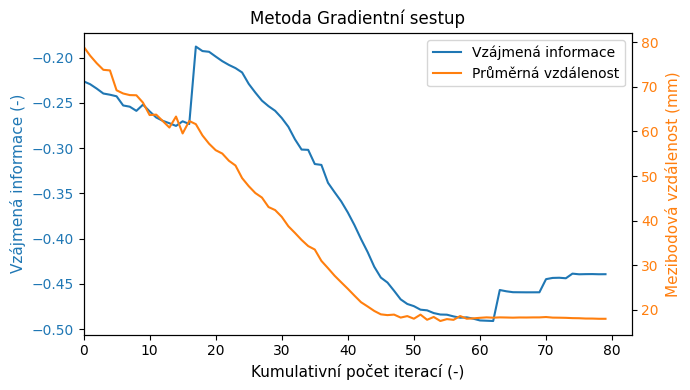

In [65]:
def plotMetricAndError(metric_values, mean_errors, multires_iters, reg_method, save=False):
    
    fig_metric_tre, ax_metric_tre = plt.subplots(1, 1, figsize=(7, 4))
    twin1 = ax_metric_tre.twinx()
    
    color1 = "tab:blue"
    color2 = "tab:orange"
    iters = np.arange(0, len(metric_values))
    plot1, = ax_metric_tre.plot(iters, metric_values, color=color1, label="Vzájmená informace")
    plot2, = twin1.plot(iters, mean_errors, color=color2, label="Průměrná vzdálenost", ls="-")
    
    ax_metric_tre.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_metric_tre.set_ylabel("Vzájmená informace (-)", fontsize=11, color=color1)
    ax_metric_tre.tick_params(axis="y", labelcolor=color1)
    twin1.set_ylabel("Mezibodová vzdálenost (mm)", fontsize=11, color=color2)
    twin1.tick_params(axis="y", labelcolor=color2)
    
    """
    ax_metric_tre.set_xlim([0, None])
    ax_metric_tre.set_ylim([None, None])
    ax_ylim = ax_metric_tre.get_ylim()
    for indx, multi_iter in enumerate(multires_iters):
        if multi_iter != multires_iters[-1]:
            ax_metric_tre.fill_between(iters[multi_iter:multires_iters[indx + 1] + 1],
                                       ax_ylim[0], # metric_values[multi_iter:multires_iters[indx + 1] + 1] - 0.05
                                       ax_ylim[1], # metric_values[multi_iter:multires_iters[indx + 1] + 1] + 0.05
                                       facecolor=colors[indx], alpha=0.6)
        else:
            ax_metric_tre.fill_between(iters[multi_iter:iters[-1] + 1],
                                       metric_values[multi_iter:iters[-1] + 1] - 0.05,
                                       metric_values[multi_iter:iters[-1] + 1] + 0.05,
                                       facecolor=colors[indx], alpha=0.6)
    
    ax_metric_tre.set_xlim([0, None])
    ax_metric_tre.set_ylim([None, None])
    ax_metric_tre.vlines(regInfo["multiresIters"], 
                         ax_metric_tre.get_ylim()[0], # metric_values[multires_iters] - 0.075 
                         ax_metric_tre.get_ylim()[1], # metric_values[multires_iters] + 0.075 
                         ls="dotted", lw=1.25, colors="black")
    
    levels = [level for level in range(len(multires_iters), 0, -1)]
    for level, multi_iter in zip(levels, multires_iters):
        ax_metric_tre.annotate(f"{level}.", (multi_iter + 1, metric_values[multi_iter] + 0.001)) 
    """
    
    ax_metric_tre.set_xlim([0, None])
    ax_metric_tre.set_ylim([None, None])
    ax_metric_tre.set_title(f"Metoda {reg_method}")
    ax_metric_tre.legend(handles=[plot1, plot2])
    
    fig_metric_tre.tight_layout()
    plt.show()


plotMetricAndError(metricValues[0], errorsInfo["meanValues"], regInfo["multiresIters"], regMethod)

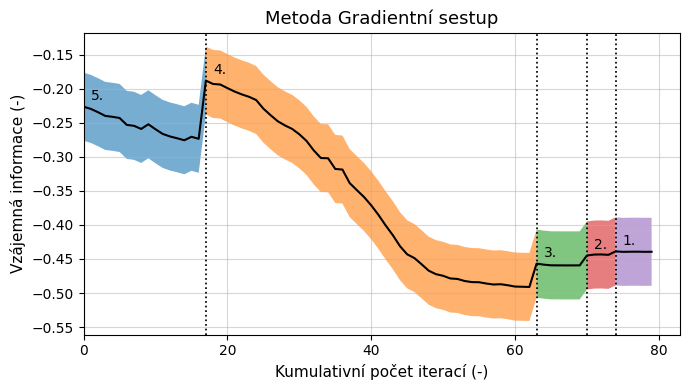

In [51]:
def plotMetricValues(metric_values, multires_iters, 
                     shrink_factors, smooth_sigmas, reg_method, save=False):
    iters = np.arange(0, len(metric_values))
    
    fig_metric, ax_metric = plt.subplots(1, 1, figsize=(7, 4))
    ax_metric.plot(iters, metric_values, label="Vzájemná informace", c="black")

    for indx, multi_iter in enumerate(multires_iters):
        if multi_iter != multires_iters[-1]:
            ax_metric.fill_between(iters[multi_iter:multires_iters[indx + 1] + 1],
                                   metric_values[multi_iter:multires_iters[indx + 1] + 1] - 0.05,
                                   metric_values[multi_iter:multires_iters[indx + 1] + 1] + 0.05,
                                   facecolor=colors[indx], alpha=0.6)
        else:
            ax_metric.fill_between(iters[multi_iter:iters[-1] + 1],
                                   metric_values[multi_iter:iters[-1] + 1] - 0.05,
                                   metric_values[multi_iter:iters[-1] + 1] + 0.05,
                                   facecolor=colors[indx], alpha=0.6)
            
    ax_metric.set_xlim([0, None])
    ax_metric.set_ylim([None, None])
    ax_ylim = ax_metric.get_ylim()
    ax_xlim = ax_metric.get_xlim()
    ax_metric.vlines(multires_iters, 
                     ax_ylim[0], # metric_values[multires_iters] - 0.075 
                     ax_ylim[1], # metric_values[multires_iters] + 0.075 
                     ls="dotted", lw=1.25, colors="black")
    
    levels = [level for level in range(len(multires_iters), 0, -1)]
    for level, multi_iter in zip(levels, multires_iters):
        ax_metric.annotate(f"{level}.", (multi_iter + 1,
                                         metric_values[multi_iter] + 0.01))
    # param_text = f"Parametry registračních úrovní:\n S = {shrink_factors}\n $\sigma^2$ = {smooth_sigmas}"
    # ax_metric.text(iters[4], -0.6, param_text, bbox=dict(edgecolor="k",
    #                                                      facecolor="none"))
    
    # ax_metric.set_xlim([0, None])
    # ax_metric.set_ylim([None, None])
        # ax_metric.annotate(f"{level}. S = {shrink}\n    $\sigma^2$ = {smooth}", 
        #                   (multi_iter + 2, ax_ylim[0] + 0.01))
    
    """
    # ax_ylim = ax_metric.get_ylim()
    # ax_metric.vlines(multires_iters, ax_ylim[0], ax_ylim[1], ls="--", colors="black")
            
    # 
    # ax_metric.fill_between(iters[multires_iters[0]:multires_iters[1] + 1], 
    #                     ax_ylim[0], 
    #                     metric_values[multires_iters[0]:multires_iters[1] + 1],
    #                  facecolor="red", alpha=0.5)
    # ax_metric.fill_between(iters[multires_iters[1]:multires_iters[2] + 1], 
    #                     ax_ylim[0], 
    #                     metric_values[multires_iters[1]:multires_iters[2] + 1],
    #                  facecolor="blue", alpha=0.5)
    # ax_metric.fill_between(iters[multires_iters[2]:iters[-1] + 1], 
    #                     ax_ylim[0], 
    #                     ax_ylim[1],
    #                  facecolor="green", alpha=0.5)
    """
    ax_metric.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_metric.set_ylabel("Vzájemná informace (-)", fontsize=11)
    ax_metric.set_title(f"Metoda {reg_method}", fontsize=13)
    ax_metric.set_xticks(np.arange(0, len(metric_values) + 10, 20))
    ax_metric.grid(alpha=0.5)
    #ax_metric.legend()
    fig_metric.tight_layout()
    plt.show()
    
    if save:
        fig_metric.savefig(f"{regDir}pacient{patientNumber}MutInf{view.upper()}.pdf", bbox_inches="tight")


plotMetricValues(regInfo["metricValues"], regInfo["multiresIters"], 
                 regInfo["shrinkFactors"], regInfo["smoothingSigmas"], regMethod, save=saveState)

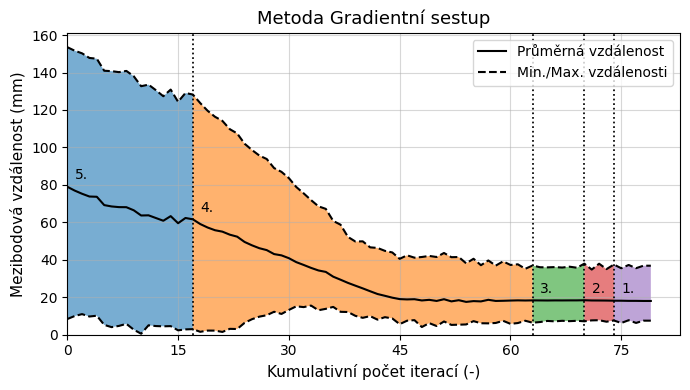

In [52]:
def plotRegistrationErrors(mean_errors, min_errors, max_errors, 
                           metric_values, multires_iters, reg_method, save=False):
    iters = np.arange(0, len(metric_values))
    # Plot the TRE mean value and the [min-max] range.
    fig_tre, ax_tre = plt.subplots(1, 1, figsize=(7, 4))
    ax_tre.plot(iters, mean_errors, color="black", label="Průměrná vzdálenost")
    ax_tre.plot(iters, min_errors, c="black", ls="--", label="Min./Max. vzdálenosti")
    ax_tre.plot(iters, max_errors, c="black", ls="--")
    
    for indx, multi_iter in enumerate(multires_iters):
        if multi_iter != multires_iters[-1]:
            ax_tre.fill_between(iters[multi_iter:multires_iters[indx + 1] + 1],
                                   min_errors[multi_iter:multires_iters[indx + 1] + 1],
                                   max_errors[multi_iter:multires_iters[indx + 1] + 1],
                                   facecolor=colors[indx], alpha=0.6)
        else:
            ax_tre.fill_between(iters[multi_iter:iters[-1] + 1],
                                   min_errors[multi_iter:iters[-1] + 1],
                                   max_errors[multi_iter:iters[-1] + 1],
                                   facecolor=colors[indx], alpha=0.6)
    ax_tre.set_xlim([0, None])
    ax_tre.set_ylim([0, None])
    ax_ylim = ax_tre.get_ylim()
    ax_tre.vlines(multires_iters, ax_ylim[0], ax_ylim[1], 
                  ls="dotted", lw=1.25, colors="black") # min_errors[multires_iters], max_errors[multires_iters], 

    levels = [level for level in range(len(multires_iters), 0, -1)]
    for level, multi_iter in zip(levels, multires_iters):
        ax_tre.annotate(f"{level}.", (multi_iter + 1, mean_errors[multi_iter] + 4))

    ax_tre.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_tre.set_ylabel("Mezibodová vzdálenost (mm)", fontsize=11)
    ax_tre.set_title(f"Metoda {reg_method}", fontsize=13)
    ax_tre.set_xticks(np.arange(0, len(metric_values) + 10, 15))
    #ax_tre.set_yticks(np.arange(0, max_errors.max(), 10))
    # ax_tre.set_xlim([0, None])
    # ax_tre.set_ylim([0, None])
    ax_tre.grid(alpha=0.5)
    ax_tre.legend()
    fig_tre.tight_layout()
    
    plt.show()
    
    if save:
        fig_tre.savefig(f"{regDir}pacient{patientNumber}Tre{view.upper()}.pdf", bbox_inches="tight")


plotRegistrationErrors(errorsInfo["meanValues"], errorsInfo["minValues"], 
                       errorsInfo["maxValues"], regInfo["metricValues"], 
                       regInfo["multiresIters"], regMethod, save=saveState)

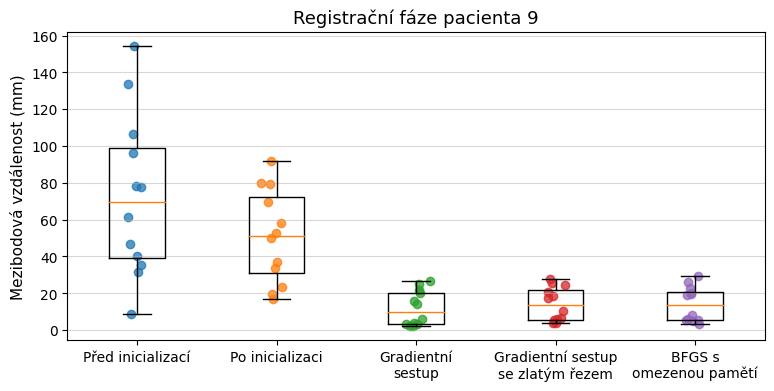

In [12]:
def plotPatientErrorBox(patient_errors, reg_stages, pat_number, save=False):
    fig_box, ax_box = plt.subplots(1, 1, figsize=(9, 4))

    ax_box.boxplot(patient_errors, labels=reg_stages, widths=0.4, showfliers=False)
    scatter_xaxis = []
    for indx, col in enumerate(range(patient_errors.shape[1])):
        scatter_xaxis.append(np.random.normal(indx + 1, 0.04, size=patient_errors.shape[0]))
    
    for xaxis, values, color in zip(scatter_xaxis, patient_errors.T, palette):
        ax_box.scatter(xaxis, values, c=color, alpha=0.75)
    
    ax_box.yaxis.grid(True, alpha=0.5)
    ax_box.set_title(f"Registrační fáze pacienta {pat_number + 1}", fontsize=13)
    ax_box.set_ylabel("Vzdálenost mezi páry bodů (mm)", fontsize=11)
    ax_box.set_ylabel("Mezibodová vzdálenost (mm)", fontsize=11)
    plt.show()

    if save:
        fig_box.savefig(f"{regDir}pacient{patientNumber}Hist{view.upper()}.pdf", bbox_inches="tight")
        

palette = colors[:5]
patNumber = 8 # 0 až 11 = 12 pacientů
patientErrors = np.array([initialErrors[:, 0, patNumber],
                          initialErrors[:, 1, patNumber],
                          gradientErrors[:, 0, patNumber],
                          gradientErrors[:, 1, patNumber],
                          gradientErrors[:, 2, patNumber]]).T
plotPatientErrorBox(patientErrors, regStages, patNumber, save=saveState)